Crosstab değişkenlerin frekans dağılımını gösteren bir tablo türüdür.
Frekans dağılımı nedir?
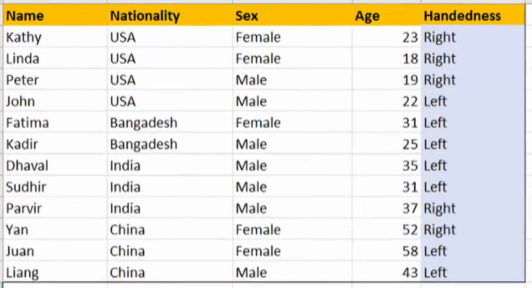

farklı ülkelerin vatandaşlarının katıldığı bir anket verisi olsun. Bu vatandaşların sağ elini mi yoksa sol elini mi kullandığı anket verileri var.

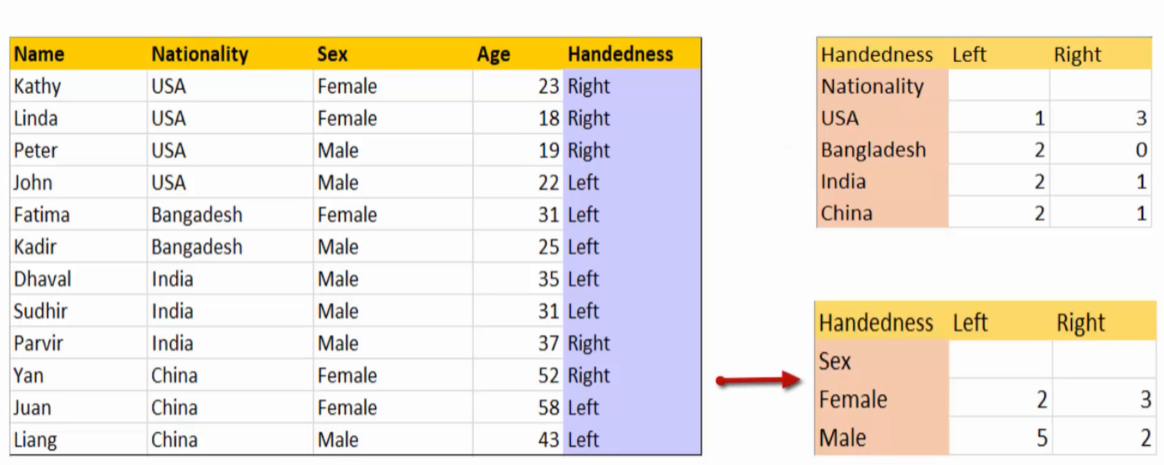

Bu verilerin ülkelere göre dağılımlarıyla sağ veya sol el kullanılması incelenebilir.
veya bu verilerin cinsiyete göre hangi eli kullandıklarının dağılımları incelenebilir. 
Bu tablolara çapraz tablolar denir ve pandas ile crosstab kullanılarak oluşturulabilirler.

In [1]:
import pandas as pd

In [3]:
df=pd.read_excel("survey_crosstab_data.xlsx")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [4]:
pd.crosstab(df.Nationality,df.Handedness) 
# ilk olarak x ekseninde satır düzenine koyulmak istenen değişken belirtilir.
# ardından y ekseninde neye göre frekans düzenine bakılacağı belirtilir.


Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [7]:
pd.crosstab(df.Sex,df.Handedness, margins=True) 
# 3. bir parametre olarak margins=True olarak verilirse
# değerlerin toplamı başka bir sütunda gösterilir

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [8]:
pd.crosstab(df.Sex,[df.Handedness, df.Nationality], margins=True) 
# Birden fazla değer için de bu hesaplamalar yapılabilir. 

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [9]:
pd.crosstab([df.Sex, df.Nationality],df.Handedness, margins=True) 
# Birden fazla değer için de bu hesaplamalar yapılabilir. 

Handedness          Left  Right  All
Sex    Nationality                  
Female Bangadesh       1      0    1
       China           1      1    2
       USA             0      2    2
Male   Bangadesh       1      0    1
       China           1      0    1
       India           2      1    3
       USA             1      1    2
All                    7      5   12

In [10]:
# Bu frekans değerlerinin normalize değerleri de bu fonksiyon ile görülebilir. 
# bu parametreyle, tüm değerler toplamına bölünerek normalize ediliyor.
# bu işlem satır düzeyinde yapılmak isteniyorsa index olarak iletilir.
pd.crosstab(df.Sex,df.Handedness,normalize='index') 

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


In [11]:
import numpy as np

In [13]:
# veri setinde kişilerin yaş ortalamasının bulunması istensin
pd.crosstab(df.Sex,df.Handedness, values= df.Age, aggfunc=np.average) 
# Bu durumda kadınlarda ve erkeklerde sol el kullananların yaş ortalaması, 
# sağ el kullananların yaş ortalaması bir tablo olarak gösterilir.

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0
